### **Implementation of Linear Regression Algorithm**

Linear Regression is a fundamental machine learning algorithm used for predicting a continuous dependent variable based on one or more independent variables. The implementation of Linear Regression involves several key steps:

---

### **1. Understanding the Mathematical Model**
Linear Regression assumes a linear relationship between the independent variable(s) $ X $ and the dependent variable $ Y $. The general equation for Simple Linear Regression (one independent variable) is:

$$
Y = mX + b
$$

For Multiple Linear Regression (multiple independent variables):

$$
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n
$$

Where:
- $ Y $ is the predicted output (dependent variable),
- $ X_1, X_2, ..., X_n $ are input features (independent variables),
- $ b_0 $ is the **intercept** (bias term),
- $ b_1, b_2, ..., b_n $ are the **coefficients** (weights) of the independent variables,
- $ m $ is the slope of the line in simple regression.

The goal is to find the best values for $ b_0, b_1, ..., b_n $ that minimize the error between predicted and actual values.


Model Accuracy (R^2 Score): 0.8627
Model Accuracy (MSE): 0.0278
Predicted value for input 4.9: 5.327500000000001


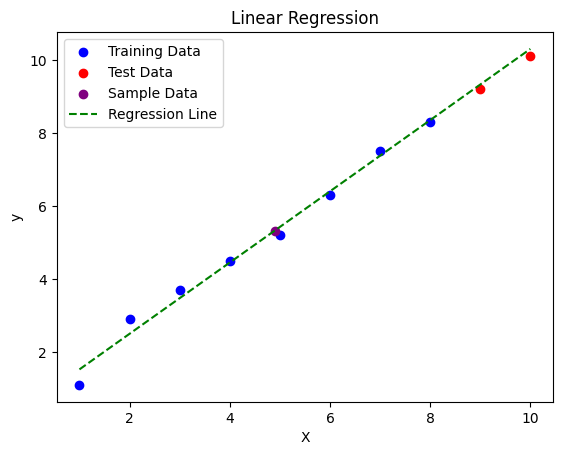

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample manual data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1.1, 2.9, 3.7, 4.5, 5.2, 6.3, 7.5, 8.3, 9.2, 10.1]) 

# Manual train-test split
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on test set
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

# Calculating model accuracy
r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R^2 Score): {r2:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Model Accuracy (MSE): {mse:.4f}")
# Predicting a sample
sample_value = np.array([[4.9]])
predicted_value = model.predict(sample_value)
print(f"Predicted value for input {sample_value.flatten()[0]}: {predicted_value.flatten()[0]}")

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.scatter([sample_value], [predicted_value], color='purple', label='Sample Data')
plt.plot(X, model.predict(X), color='green', linestyle='dashed', label='Regression Line')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()



### **Metrics**
1. ### **R-Square (R²)**

The **R-Square (R²) score**, also called the **coefficient of determination**, is a statistical measure that indicates how well the independent variable(s) explain the variance in the dependent variable.

#### **Formula:**
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
Where:
- $ SS_{res} $  = **Residual Sum of Squares (RSS)**  
  $$
  SS_{res} = \sum (y_{true} - y_{pred})^2
  $$
  This represents the total squared differences between actual values ($y_{true}$ ) and predicted values ($y_{pred}$ ).

- $ SS_{tot} $  = **Total Sum of Squares (TSS)**  
  $$
  SS_{tot} = \sum (y_{true} - \bar{y})^2
  $$
  This represents the squared differences between actual values ($y_{true}$ ) and the **mean** of actual values ($\bar{y}$ ).

### **Interpretation of R²**
- **R² = 1:** Perfect fit (all data points lie on the regression line).
- **R² = 0:** The model does not explain any variance in the dependent variable.
- **R² < 0:** The model performs worse than a simple mean-based model (bad fit).

### **Example Calculation**
Let's assume we have:
- **Actual values**: $ y_{true} = [3, 5, 7, 9] $ 
- **Predicted values**: $ y_{pred} = [2.8, 5.2, 6.8, 9.1] $ 
- **Mean of actual values**: $ \bar{y} = (3+5+7+9)/4 = 6 $ 

Now, compute the sum of squares:

1. **Compute:** $ SS_{res} $ 
   $$
   (3 - 2.8)^2 + (5 - 5.2)^2 + (7 - 6.8)^2 + (9 - 9.1)^2
   $$
   $$
   = (0.2)^2 + (-0.2)^2 + (0.2)^2 + (-0.1)^2 = 0.04 + 0.04 + 0.04 + 0.01 = 0.13
   $$

2. **Compute:** $ SS_{tot} $ 
   $$
   (3 - 6)^2 + (5 - 6)^2 + (7 - 6)^2 + (9 - 6)^2
   $$
   $$
   = (-3)^2 + (-1)^2 + (1)^2 + (3)^2 = 9 + 1 + 1 + 9 = 20
   $$

3. **Compute:** $ R^2 $ 
   $$
   R^2 = 1 - \frac{0.13}{20} = 1 - 0.0065 = 0.9935
   $$

**Conclusion**
- The **R² score of 0.9935** means that **99.35% of the variance in the dependent variable is explained by the model**.
- A high R² value indicates a strong model fit.



2. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between actual and predicted values.
   - A lower MSE indicates better performance.
   - Formula:  
     $$
     MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2
     $$
   - `mean_squared_error(y_test, y_pred)`

 **Key Interpretations:**
1. **Lower MSE = Better Fit**  
   - A lower MSE indicates that the model's predictions are closer to the actual values, meaning better accuracy.

2. **Higher MSE = Poor Fit**  
   - A higher MSE suggests that the model's predictions deviate significantly from the actual values, indicating poor performance.

3. **Squared Differences Impact**  
   - Since errors are squared, larger errors contribute disproportionately more to the MSE. This makes MSE sensitive to large outliers.

4. **Units of MSE**  
   - MSE is expressed in the squared units of the dependent variable. For example, if predicting **house prices in dollars**, MSE would be in **square dollars ($²)**, which can be hard to interpret directly.

5. **Comparing Models**  
   - When comparing multiple models, the one with the **lower MSE** is usually preferred, assuming similar complexity.

### **Significance of Variance and Correlation in Linear Regression**

Variance and correlation play crucial roles in understanding the behavior of independent variables and their impact on the dependent variable in **Linear Regression**.

---

### **1. Variance in Linear Regression**
Variance measures how much a variable deviates from its mean. In Linear Regression, it affects both the independent and dependent variables in the following ways:

- **High Variance in Features**:  
  - A feature with high variance indicates a large spread in data points, which can help the model capture patterns effectively.
  - However, extremely high variance may lead to **overfitting**, where the model learns noise rather than the actual pattern.

- **Low Variance in Features**:  
  - A feature with low variance provides limited information and may not contribute significantly to the model.
  - If variance is too low, the feature might be redundant, making it less useful in predicting the dependent variable.

- **Bias-Variance Tradeoff**:  
  - High variance can lead to **overfitting** (model captures noise), while low variance may lead to **underfitting** (model is too simple).
  - A good model maintains a balance between bias (error due to incorrect assumptions) and variance (error due to fluctuations in training data).

---

### **2. Correlation in Linear Regression**
Correlation measures the strength and direction of a linear relationship between two variables. It is crucial in Linear Regression because:

- **High Positive Correlation ($ r \approx +1 $)**:
  - If an independent variable has a high positive correlation with the dependent variable, increasing the independent variable leads to an increase in the dependent variable.
  - Such variables are useful predictors in Linear Regression.

- **High Negative Correlation ($ r \approx -1 $)**:
  - If an independent variable has a strong negative correlation with the dependent variable, an increase in the independent variable leads to a decrease in the dependent variable.
  - This can still be useful for prediction but in the opposite direction.

- **Low or No Correlation ($ r \approx 0 $)**:
  - If a feature has little to no correlation with the target variable, it may not be useful for prediction.
  - Including such variables can introduce noise and reduce model performance.

- **Multicollinearity Issue**:
  - When independent variables are highly correlated with each other, it can cause problems in Linear Regression.
  - Multicollinearity makes it difficult to determine the individual effect of each feature, leading to unstable coefficient estimates.
  - It is important to remove or transform highly correlated features to improve model reliability.

---

### **In Essence**
- **Variance** affects the spread of data and influences overfitting or underfitting.
- **Correlation** helps determine the strength and direction of relationships between variables, guiding feature selection.
- A good Linear Regression model considers both **variance (ensuring useful spread in data)** and **correlation (choosing relevant predictors while avoiding multicollinearity)** to achieve optimal performance.

